In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [2]:
df=pd.read_csv(r'/home/sunail/Downloads/House_for_rent_islamabad_pk.csv')

In [3]:
df.head(10)

,Unnamed: 0,Location,Area,Bedrooms,Baths,Price
0,0,F-8,26.0,4.0,5.0,420000
1,1,DHA,11.0,3.0,4.0,100000
2,2,F-8,26.0,4.0,5.0,650000
3,3,F-6,20.0,6.0,6.0,450000
4,4,D-17,10.0,9.0,6.0,120000
5,5,Bahria,5.0,4.0,5.0,70000
6,6,F-11,20.0,4.0,5.0,350000
7,7,F-7,40.0,5.0,6.0,2900000
8,8,DHA,20.0,6.0,6.0,280000
9,9,I-8,10.0,5.0,6.0,275000


In [4]:
df.tail()

,Unnamed: 0,Location,Area,Bedrooms,Baths,Price
3894,3894,F-11,20.0,5.0,6.0,500000
3895,3895,F-8,26.0,7.0,NaN,1000000
3896,3896,E-11,20.0,7.0,6.0,600000
3897,3897,E-7,40.0,6.0,6.0,3500000
3898,3898,F-7,100.0,5.0,5.0,2695000


In [5]:
df.size

23394

In [6]:
df.shape

(3899, 6)

In [7]:
df.columns

Index(['Unnamed: 0', 'Location', 'Area', 'Bedrooms', 'Baths', 'Price'], dtype='object')

In [8]:
df.describe()

,Unnamed: 0,Area,Bedrooms,Baths,Price
count,3899.000000,3899.000000,3762.00000,3616.000000,3.899000e+03
mean,1949.000000,22.544883,5.14487,5.111449,4.950650e+05
std,1125.688678,84.336261,1.66992,1.148465,6.327347e+05
min,0.000000,0.900000,1.00000,1.000000,0.000000e+00
25%,974.500000,10.000000,4.00000,4.000000,1.200000e+05
50%,1949.000000,20.000000,5.00000,6.000000,2.500000e+05
75%,2923.500000,24.000000,6.00000,6.000000,6.500000e+05
max,3898.000000,4500.000000,11.00000,10.000000,8.000000e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3899 non-null   int64  
 1   Location    3899 non-null   object 
 2   Area        3899 non-null   float64
 3   Bedrooms    3762 non-null   float64
 4   Baths       3616 non-null   float64
 5   Price       3899 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 182.9+ KB


<AxesSubplot:>

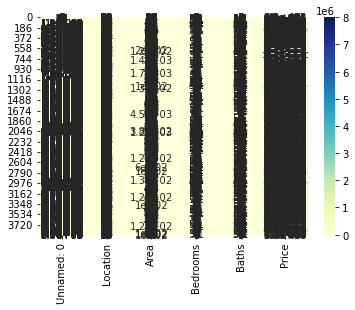

In [20]:
sns.heatmap(df, annot=True, cmap="YlGnBu")

In [10]:
# we will fill the null values with the average or mean 
df['Bedrooms']=df['Bedrooms'].fillna(df['Bedrooms'].mean())
df['Baths']=df['Baths'].fillna(df['Baths'].mean())

In [11]:
# lets check again for the null values
df.isna().sum()


Unnamed: 0    0
Location      0
Area          0
Bedrooms      0
Baths         0
Price         0
dtype: int64

Text(0, 0.5, 'Count')

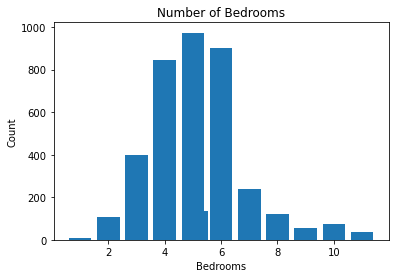

In [30]:
# df['Bedrooms'].value_counts().plot(kind='bar')
plt.bar(df['Bedrooms'].value_counts().index, df['Bedrooms'].value_counts())
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')




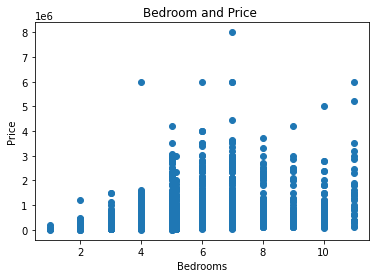

In [34]:
plt.scatter(df.Bedrooms,df.Price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

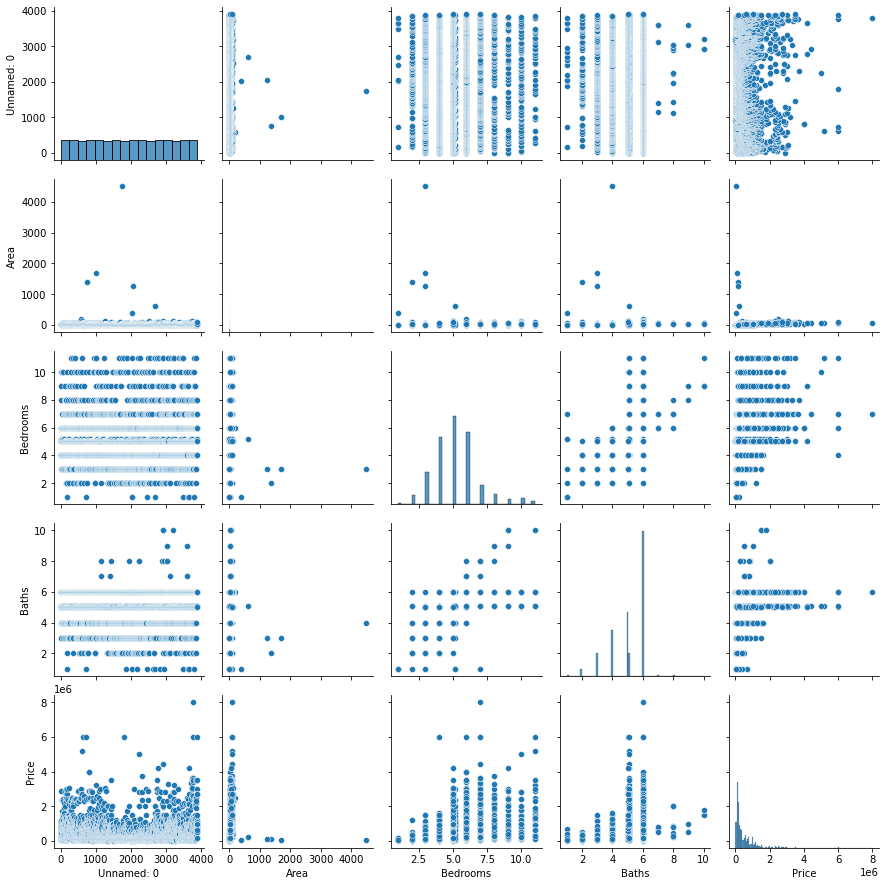

In [12]:
sns.pairplot(df)

In [13]:
label_encoder=LabelEncoder()
df['Location']=label_encoder.fit_transform(df.Location)

In [14]:
X_labels=['Location','Area','Bedrooms','Baths']

X=df[X_labels]
Y=df.Price

x_train,x_test,y_train,y_test=train_test_split(X,Y)

In [15]:
model=LinearRegression()

In [16]:
model.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred=model.predict(x_test)

In [18]:
M_S_E= mean_squared_error(y_test,y_pred)

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))


MAE: 360788.00809414
MSE: 323077837487.2355
